In [2]:
! pip install pandas


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 4.2 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/11.1 MB 7.2 MB/s eta 0:00:02
   ------------ --------------------------- 3.4/11.1 MB 8.0 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/11.1 MB 8.6 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.1 MB 8.8 MB/s eta 0:00:01
   ------------------------------------ --- 10.2/11.1 MB 8.7 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 8.5 MB/s eta 0:00:00
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)


In [14]:
import pandas as pd
import numpy as np
data = pd.read_csv('E:/Capstone_AIFSHOP/balanced_dataset.csv')
data

,weight,age,height,size
0,61,35.0,165.10,L
1,62,25.0,162.56,L
2,58,NaN,152.40,L
3,68,33.0,160.02,L
4,58,43.0,172.72,L
...,...,...,...,...
6064,72,42.0,180.34,XXXL
6065,113,32.0,172.72,XXXL
6066,72,34.0,170.18,XXXL
6067,71,53.0,167.64,XXXL


In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv('E:/Capstone_AIFSHOP/Data/final_test.csv/final_test.csv')
data

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


In [15]:
data.isna().sum()

weight     0
age       15
height    16
size       0
dtype: int64

In [16]:
# Filling the missing values with the median
data['age'] = data ['age'].fillna(data['age'].median())
data['height'] = data ['height'].fillna(data['height'].median())

In [17]:
data.isna().sum()

weight    0
age       0
height    0
size      0
dtype: int64

In [18]:
data["size"].value_counts()

size
L       1000
M       1000
S       1000
XL      1000
XXS     1000
XXXL    1000
XXL       69
Name: count, dtype: int64

In [19]:
xxl_data = data[data["size"] == "XXL"]

In [20]:
xxl_data

,weight,age,height,size
4000,68,43.0,162.56,XXL
4001,68,28.0,157.48,XXL
4002,66,33.0,162.56,XXL
4003,72,29.0,160.02,XXL
4004,63,29.0,154.94,XXL
...,...,...,...,...
4064,70,39.0,157.48,XXL
4065,67,37.0,157.48,XXL
4066,68,40.0,162.56,XXL
4067,58,44.0,154.94,XXL


In [21]:
# Oversample XXL to 1000 rows
xxl_upsampled = xxl_data.sample(n=1000, replace=True, random_state=42)

In [22]:
data_rest = data[data["size"] != "XXL"]

In [23]:
data_rest

,weight,age,height,size
0,61,35.0,165.10,L
1,62,25.0,162.56,L
2,58,32.0,152.40,L
3,68,33.0,160.02,L
4,58,43.0,172.72,L
...,...,...,...,...
6064,72,42.0,180.34,XXXL
6065,113,32.0,172.72,XXXL
6066,72,34.0,170.18,XXXL
6067,71,53.0,167.64,XXXL


In [24]:
final_df = pd.concat([data_rest, xxl_upsampled], ignore_index=True)

In [25]:
final_df["size"].value_counts()

size
L       1000
M       1000
S       1000
XL      1000
XXS     1000
XXXL    1000
XXL     1000
Name: count, dtype: int64

In [26]:
final_df.to_csv("balanced_dataset_with_1000.csv", index=False)


==== Training on dataset: Dataset Raw ====

Training model: Random Forest
Accuracy: 0.51 - F1_macro: 0.51

Training model: KNN
Accuracy: 0.51 - F1_macro: 0.51

Training model: Logistic Regression


c:\Users\chuon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\chuon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.52 - F1_macro: 0.52

Training model: CatBoost
Accuracy: 0.54 - F1_macro: 0.53

Training model: XGBoost


c:\Users\chuon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [20:41:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.56 - F1_macro: 0.55

Training model: LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 383
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 4
[LightGBM] [Info] Start training from score -1.949667
[LightGBM] [Info] Start training from score -1.976369
[LightGBM] [Info] Start training from score -1.918781
[LightGBM] [Info] Start training from score -1.964838
[LightGBM] [Info] Start training from score -1.928562
[LightGBM] [Info] Start training from score -1.924883
[LightGBM] [Info] Start training from score -1.959756
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

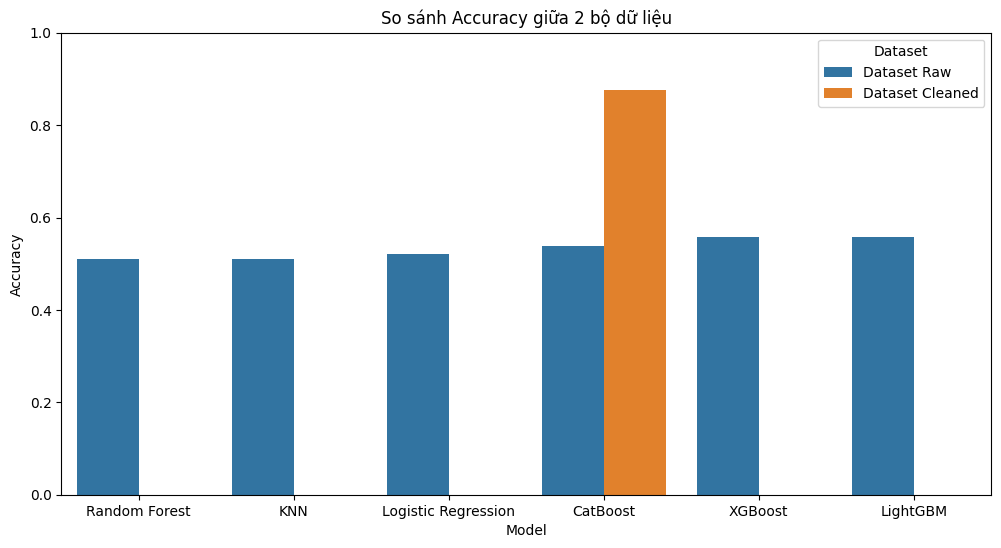

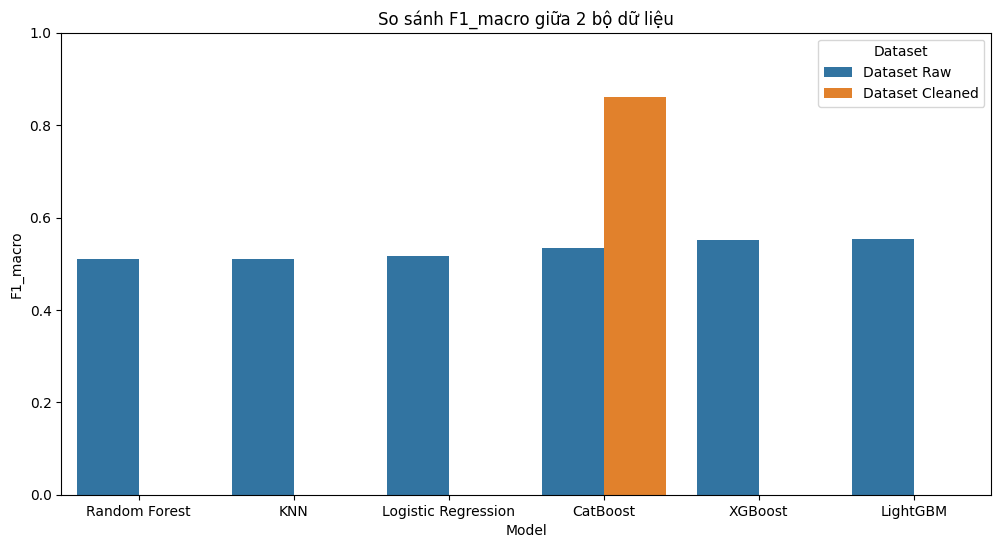

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# ======= Hàm train và đánh giá trên 1 dataset =======
def train_and_evaluate(dataset_path, dataset_name):
    print(f"\n==== Training on dataset: {dataset_name} ====")
    df = pd.read_csv(dataset_path)
    
    # Tính BMI nếu chưa có
    if 'BMI' not in df.columns:
        df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)
    
    # Encode nhãn size
    le = LabelEncoder()
    df['size_encoded'] = le.fit_transform(df['size'])
    
    # Kiểm tra có cột gender không
    has_gender = 'gender' in df.columns
    
    if has_gender:
        df['gender'] = df['gender'].astype(str)
    
    # Chọn cột feature phù hợp
    feature_cols = ['height', 'weight', 'age', 'BMI']
    if has_gender:
        feature_cols.append('gender')
    
    X = df[feature_cols]
    y = df['size_encoded']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'KNN': KNeighborsClassifier(n_neighbors=5),
        'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='multinomial'),
        'CatBoost': CatBoostClassifier(iterations=300, depth=4, learning_rate=0.05, verbose=0, random_state=42),
        'XGBoost': XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=4, use_label_encoder=False, eval_metric='mlogloss', random_state=42),
        'LightGBM': LGBMClassifier(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=42)
    }
    
    results = {"Model": [], "Accuracy": [], "F1_macro": [], "Dataset": []}
    
    for name, model in models.items():
        print(f"\nTraining model: {name}")
        try:
            if name == 'CatBoost' and has_gender:
                model.fit(X_train, y_train, cat_features=['gender'])
            else:
                model.fit(X_train, y_train)
            
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='macro')
            
            results["Model"].append(name)
            results["Accuracy"].append(acc)
            results["F1_macro"].append(f1)
            results["Dataset"].append(dataset_name)
            
            print(f"Accuracy: {acc:.2f} - F1_macro: {f1:.2f}")
        except Exception as e:
            print(f"⚠️ Model {name} failed: {e}")
        
    return pd.DataFrame(results)

# ======= Chạy cho cả 2 dataset =======
results_1 = train_and_evaluate("E:/Capstone_AIFSHOP/balanced_dataset_with_1000.csv", "Dataset Raw")
results_2 = train_and_evaluate("E:/Capstone_AIFSHOP/cleaned_dataset_catboost_final.csv", "Dataset Cleaned")

# Gộp kết quả
all_results = pd.concat([results_1, results_2], ignore_index=True)

# Vẽ biểu đồ so sánh
plt.figure(figsize=(12,6))
sns.barplot(data=all_results, x="Model", y="Accuracy", hue="Dataset")
plt.title("So sánh Accuracy giữa 2 bộ dữ liệu")
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=all_results, x="Model", y="F1_macro", hue="Dataset")
plt.title("So sánh F1_macro giữa 2 bộ dữ liệu")
plt.ylim(0, 1)
plt.show()
